#📌 Extracción

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [3]:
norm_customer = pd.json_normalize(df['customer'])
norm_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [4]:
norm_phone = pd.json_normalize(df['phone'])
norm_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [5]:
norm_internet = pd.json_normalize(df['internet'])
norm_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [6]:
norm_account = pd.json_normalize(df['account'])
norm_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
norm = pd.concat([df, norm_customer, norm_phone, norm_internet, norm_account], axis=1)
norm.head()

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
columas_eliminar = ['customer', 'phone', 'internet', 'account']
norm = norm.drop(columas_eliminar, axis=1)
norm

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [9]:
norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
import numpy as np

In [11]:
#Convierto la columna deseada a númerico, forzando los errores a que pasen a NaN
norm['Charges.Total'] = pd.to_numeric(norm['Charges.Total'], errors='coerce')

In [12]:
#Ahora convierto la columna a float64, podiendo manjeara valores NaN
norm['Charges.Total'] = norm['Charges.Total'].astype('float64')

In [13]:
norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
norm['Contract'] = norm['Contract'].str.replace('-',' ', regex=True)
norm['Contract']

,Contract
0,One year
1,Month to month
2,Month to month
3,Month to month
4,Month to month
...,...
7262,One year
7263,Month to month
7264,Month to month
7265,Two year


In [15]:
norm

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month to month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month to month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month to month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month to month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [16]:
Val_uniq_vali = ['MultipleLines', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for columna in Val_uniq_vali:
    print(f"--- Validando columna: '{columna}' ---")
    valores1 = norm[columna].unique()
    print(valores1)

--- Validando columna: 'MultipleLines' ---
['No' 'Yes' 'No phone service']
--- Validando columna: 'Churn' ---
['No' 'Yes' '']
--- Validando columna: 'gender' ---
['Female' 'Male']
--- Validando columna: 'Partner' ---
['Yes' 'No']
--- Validando columna: 'Dependents' ---
['Yes' 'No']
--- Validando columna: 'PhoneService' ---
['Yes' 'No']
--- Validando columna: 'OnlineBackup' ---
['Yes' 'No' 'No internet service']
--- Validando columna: 'DeviceProtection' ---
['No' 'Yes' 'No internet service']
--- Validando columna: 'TechSupport' ---
['Yes' 'No' 'No internet service']
--- Validando columna: 'StreamingTV' ---
['Yes' 'No' 'No internet service']
--- Validando columna: 'StreamingMovies' ---
['No' 'Yes' 'No internet service']
--- Validando columna: 'PaperlessBilling' ---
['Yes' 'No']


In [17]:
norm['MultipleLines'] = norm['MultipleLines'].str.replace('No phone service','No', regex=True)
norm['MultipleLines']

,MultipleLines
0,No
1,Yes
2,No
3,No
4,No
...,...
7262,No
7263,Yes
7264,No
7265,No


In [18]:
#Creando la nueva columna para ver el valor diario usando la columna de faturación mensual.
norm['Cuentas.Diarias'] = norm['Charges.Monthly']
norm['Cuentas.Diarias']

,Cuentas.Diarias
0,65.60
1,59.90
2,73.90
3,98.00
4,83.90
...,...
7262,55.15
7263,85.10
7264,50.30
7265,67.85


In [19]:
norm

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas.Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,65.60
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month to month,No,Mailed check,59.90,542.40,59.90
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month to month,Yes,Electronic check,73.90,280.85,73.90
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month to month,Yes,Electronic check,98.00,1237.85,98.00
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month to month,Yes,Mailed check,83.90,267.40,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,55.15
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month to month,Yes,Electronic check,85.10,1873.70,85.10
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month to month,Yes,Mailed check,50.30,92.75,50.30
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,67.85


#📊 Carga y análisis

In [20]:
norm.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas.Diarias
count,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,32.346498,64.720098,2280.634213,64.720098
std,0.369074,24.571773,30.129572,2268.632997,30.129572
min,0.000000,0.000000,18.250000,18.800000,18.250000
25%,0.000000,9.000000,35.425000,400.225000,35.425000
50%,0.000000,29.000000,70.300000,1391.000000,70.300000
75%,0.000000,55.000000,89.875000,3785.300000,89.875000
max,1.000000,72.000000,118.750000,8684.800000,118.750000


In [21]:
#Instalamaos las bibliotecas para los graficos necesarios
!pip install matplotlib seaborn

In [22]:
#Importando librerias para los graficos
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Acá seleccionamos las 3 columnas de interes
Columnas_analizar = ['gender', 'Contract', 'PaymentMethod']
sub_dataframe = norm[Columnas_analizar]
sub_dataframe

,gender,Contract,PaymentMethod
0,Female,One year,Mailed check
1,Male,Month to month,Mailed check
2,Male,Month to month,Electronic check
3,Male,Month to month,Electronic check
4,Female,Month to month,Mailed check
...,...,...,...
7262,Female,One year,Mailed check
7263,Male,Month to month,Electronic check
7264,Male,Month to month,Mailed check
7265,Male,Two year,Mailed check


In [24]:
#Porcedemos a configurar los gráficos
sns.set_theme(style="whitegrid")

##**Recuento de evasión por variables categóricas**

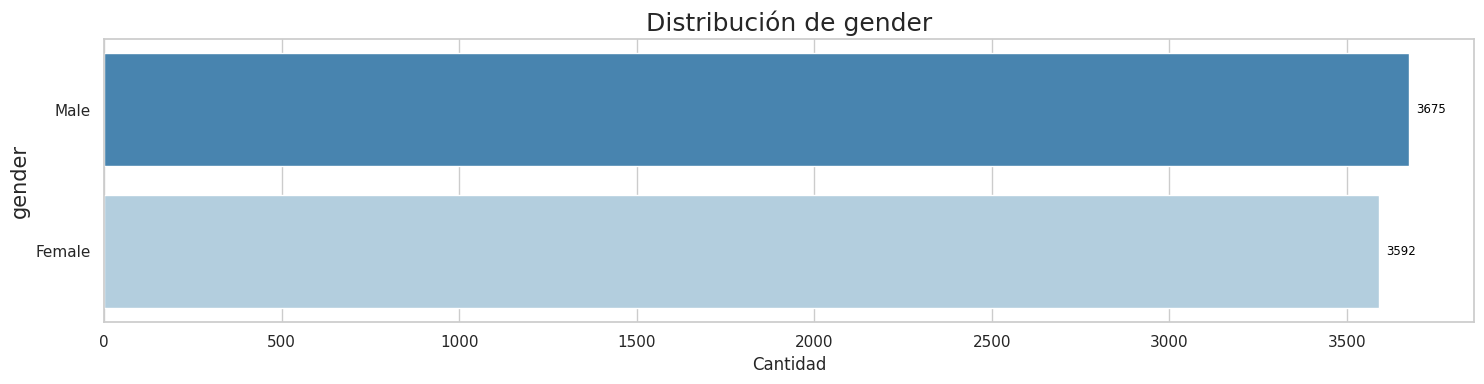

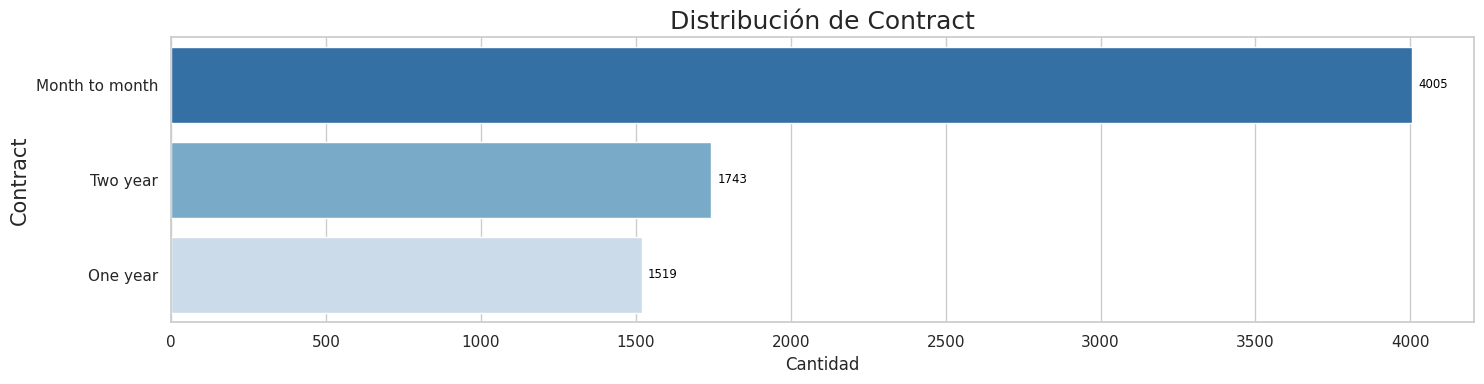

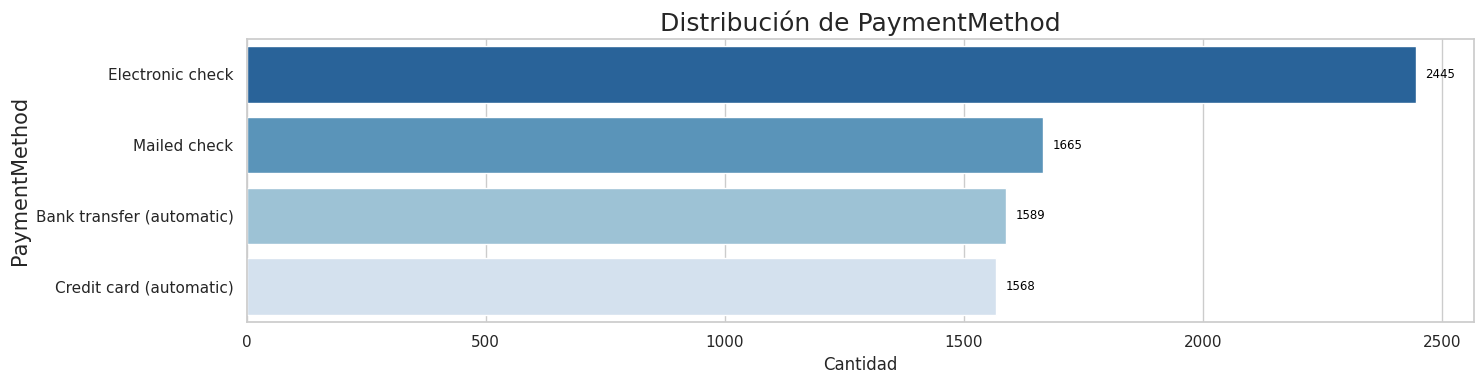

In [58]:
for columna in Columnas_analizar:
    plt.figure(figsize=(15, 4))
    #Se calcula el conteo de cada categoría
    #En este paso .value_counts() devuelve una Serie, reset_index() la convierte en DataFrame
    conteo_categoria = sub_dataframe[columna].value_counts().reset_index()
    conteo_categoria.columns = [columna, 'Cantidad']

    #Comenzamos a grficar con seaborn
    ax = sns.barplot(data=conteo_categoria, x='Cantidad', y=columna, orient='h', hue=columna, palette='Blues_r', legend=False)

    plt.title(f'Distribución de {columna}', fontsize=18)
    plt.xlabel('Cantidad')
    plt.ylabel(columna, fontsize=15)

    for i,j in enumerate(conteo_categoria['Cantidad']):
        ax.text(j+20,i, str(j), color='black', fontsize=8.5, ha='left', va='center')

    plt.savefig(f'{columna}_distribucion.png')
    plt.tight_layout()
    plt.show()

##**Conteo de evasión por variables numéricas**

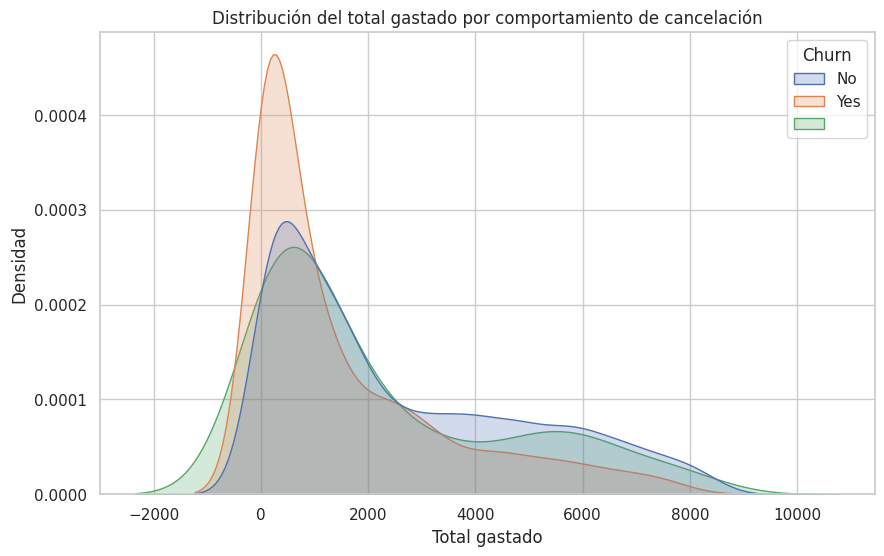

In [38]:
#Comenzamos con el gráfico de densidad para comprar Charges.Total y Churn
plt.figure(figsize=(10,6))
sns.kdeplot(data=norm, x='Charges.Total', hue='Churn', fill=True, common_norm=False)

plt.title('Distribución del total gastado por comportamiento de cancelación')
plt.xlabel('Total gastado')
plt.ylabel('Densidad')

plt.show()


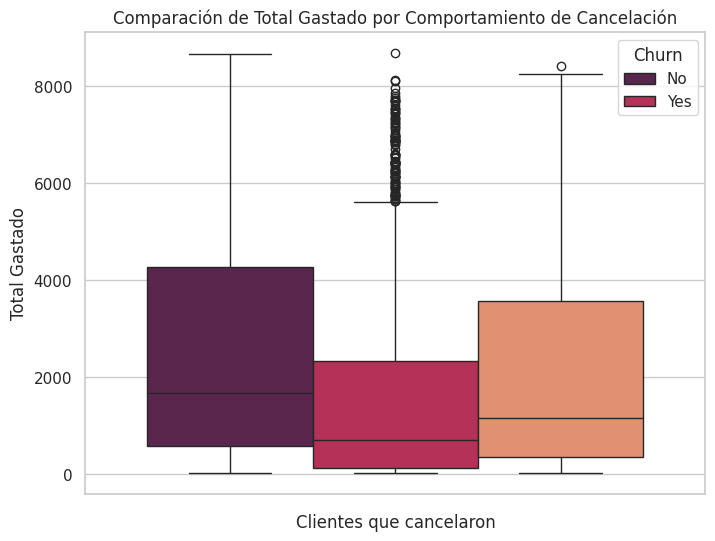

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=norm, hue='Churn', y='Charges.Total', palette='rocket')

plt.title('Comparación de Total Gastado por Comportamiento de Cancelación')
plt.xlabel('Clientes que cancelaron')
plt.ylabel('Total Gastado')

plt.show()

# 📄 Informe de Análisis de Evasión de Clientes

Este informe resume el análisis de datos realizado para comprender y abordar el problema de la evasión de clientes en la empresa TelecomX.

---

## 🔹 Introducción

El problema de la evasión de clientes, o "Churn", representa una pérdida significativa de ingresos y recursos para las empresas, incluyendo las de telecomunicaciones como TelecomX. Comprender por qué los clientes deciden cancelar sus servicios es crucial para desarrollar estrategias de retención efectivas.

El objetivo de este análisis es explorar los datos de clientes proporcionados, identificar patrones y factores que están asociados con la evasión, y generar insights que puedan ayudar a TelecomX a reducir su tasa de Churn.

---

## 🔹 Limpieza y Tratamiento de Datos

Se realizó un proceso de limpieza y transformación de los datos para prepararlos para el análisis. Los pasos principales incluyeron:

*   **Importación de Datos:** Los datos fueron cargados desde la URL proporcionada utilizando la biblioteca Pandas.
*   **Normalización de Estructuras Anidadas:** Las columnas con estructuras JSON anidadas (`customer`, `phone`, `internet`, `account`) fueron normalizadas y combinadas con el DataFrame principal para facilitar el acceso a la información detallada de cada cliente.
*   **Eliminación de Columnas Originales:** Las columnas anidadas originales (`customer`, `phone`, `internet`, `account`) se eliminaron una vez que su contenido fue extraído y normalizado.
*   **Manejo de Valores Numéricos:** La columna 'Charges.Total' fue convertida a tipo numérico, manejando los posibles errores mediante coerción a `NaN`. Posteriormente, se verificó y confirmó que no existen valores negativos en esta columna.
*   **Estandarización de Texto:** Se realizaron ajustes en formatos de texto, como reemplazar guiones por espacios en la columna 'Contract' y estandarizar valores en 'MultipleLines'.
*   **Creación de Nuevas Variables:** Se creó la columna 'Cuentas.Diarias' donde se realizó la división del total entre 30(días del mes).

---

## 🔹 Análisis Exploratorio de Datos (EDA)

Se llevaron a cabo varios análisis exploratorios para comprender las características de los clientes y su relación con la evasión.

*   **Análisis Descriptivo General:** Se obtuvieron estadísticas descriptivas de las variables numéricas para tener una visión general de la distribución de los datos.

*   **Distribución de Variables Categóricas:** Se examinó la distribución de clientes en variables categóricas clave como 'gender', 'Contract' y 'PaymentMethod'.

##Distribución de Gender
![Gráfico de Gender](https://drive.google.com/uc?id=17-2fgJO6coLGdMw8B4XMCD2jdoqLSrbi)

## Distribución de Contract
![Gráfico de Contract](https://drive.google.com/uc?id=1BuAdnxIJ5EWIgq2lmsziua_RkyHAwIDU)

## Distribución de PaymentMethod
![Gráfico de PaymentMethod](https://drive.google.com/uc?id=1KzFbDdIBz-4yJC2CKkcVwMxE_0Ad6D-8)


*   **Análisis de Variables Numéricas y Evasión:** Se exploró la relación entre variables numéricas clave y el comportamiento de cancelación.
    *   **Total Gastado ('Charges.Total'):** Se comparó la distribución del gasto total entre clientes que cancelaron y los que no.

## Comportamiento de Cancelación
![Gráfico Comportamiento de Cancelación](https://drive.google.com/uc?id=1hFSV_lursSwuK_5V4YlKaDqzUQ4o5JSf)

---

## 🔹 Conclusiones e Insights

Basado en el análisis exploratorio, se identificaron varios patrones clave relacionados con la evasión de clientes:

*   **(Conclusión 1):**Se evidencia que la cantidad del contrato de 'Mes a Mes' es mayor a los otros, siendo que esos clientes son los más propensos a desistir del servicio.

*   **(Conclusión 2):**Los clientes que cancelan tienden a tener un 'Total Gastado' [menor/mayor] que los que no cancelan, como se observa en la mediana más baja/alta del boxplot.

Estos insights sugieren que la evasión no es un fenómeno aleatorio y está influenciada por factores como el gasto total, el tiempo de contrato y las características del servicio/contrato.

---

## 🔹 Recomendaciones

Para reducir la tasa de evasión de clientes, se sugieren las siguientes estrategias basadas en los hallazgos del análisis:

*   **Recomendación 1 (Basada en 'Charges.Total'):** Si los clientes con menor "Total Gastado" o menor "Tiempo de Contrato" tienen mayor probabilidad de cancelar, "Implementar programas de fidelización o incentivos especiales para clientes nuevos o aquellos con bajo gasto acumulado para fomentar su permanencia."
*   **Recomendación 2 (Basada en Métodos de Pago o Tipos de Contrato):** Si ciertos métodos de pago o tipos de contrato están asociados con mayor Churn, "Investigar las razones detrás de la alta tasa de evasión en los clientes que utilizan [Método de Pago X] o tienen un contrato [Tipo de Contrato Y], y considerar ajustar las ofertas o mejorar la experiencia del cliente en esos segmentos."
*   **Recomendación 3 (Basada en Servicios Adicionales):** Si clientes sin ciertos servicios (ej. soporte técnico, protección de dispositivo) cancelan más, "Promocionar activamente los servicios de valor agregado que parecen estar asociados con una menor tasa de evasión."

Estas recomendaciones son un punto de partida y deberían validarse con análisis de negocio y posibles pruebas.

---

## Próximos Pasos.

*   Desarrollar un modelo predictivo de Churn para identificar clientes en riesgo.
*   Realizar un análisis más profundo de la rentabilidad por segmento de cliente.
*   Evaluar la efectividad de las recomendaciones implementadas.